In [ ]:
!pip install findspark

In [1]:
import findspark
findspark.init()

In [2]:
import pandas as pd
import pyspark

In [3]:
!hdfs dfs -ls /user/ubuntu/data

Found 40 items
-rw-r--r--   1 ubuntu hadoop 2807409271 2026-01-31 19:23 /user/ubuntu/data/2019-08-22.txt
-rw-r--r--   1 ubuntu hadoop 2854479008 2026-01-31 19:32 /user/ubuntu/data/2019-09-21.txt
-rw-r--r--   1 ubuntu hadoop 2895460543 2026-01-31 19:36 /user/ubuntu/data/2019-10-21.txt
-rw-r--r--   1 ubuntu hadoop 2939120942 2026-01-31 19:22 /user/ubuntu/data/2019-11-20.txt
-rw-r--r--   1 ubuntu hadoop 2995462277 2026-01-31 19:28 /user/ubuntu/data/2019-12-20.txt
-rw-r--r--   1 ubuntu hadoop 2994906767 2026-01-31 19:43 /user/ubuntu/data/2020-01-19.txt
-rw-r--r--   1 ubuntu hadoop 2995431240 2026-01-31 19:40 /user/ubuntu/data/2020-02-18.txt
-rw-r--r--   1 ubuntu hadoop 2995176166 2026-01-31 19:34 /user/ubuntu/data/2020-03-19.txt
-rw-r--r--   1 ubuntu hadoop 2996034632 2026-01-31 19:19 /user/ubuntu/data/2020-04-18.txt
-rw-r--r--   1 ubuntu hadoop 2995666965 2026-01-31 19:47 /user/ubuntu/data/2020-05-18.txt
-rw-r--r--   1 ubuntu hadoop 2994699401 2026-01-31 19:41 /user/ubuntu/data/2020-06-17

In [8]:
!hdfs dfs -head /user/ubuntu/data/2019-08-22.txt

# tranaction_id | tx_datetime | customer_id | terminal_id | tx_amount | tx_time_seconds | tx_time_days | tx_fraud | tx_fraud_scenario
0,2019-08-22 06:51:03,0,711,70.91,24663,0,0,0
1,2019-08-22 05:10:37,0,0,90.55,18637,0,0,0
2,2019-08-22 19:05:33,0,753,35.38,68733,0,0,0
3,2019-08-22 07:21:33,0,0,80.41,26493,0,0,0
4,2019-08-22 09:06:17,1,981,102.83,32777,0,0,0
5,2019-08-22 18:41:25,3,205,34.20,67285,0,0,0
6,2019-08-22 03:12:21,3,0,47.20,11541,0,0,0
7,2019-08-22 22:36:40,6,809,139.39,81400,0,0,0
8,2019-08-22 17:23:29,7,184,87.24,62609,0,0,0
9,2019-08-22 21:09:37,8,931,61.70,76177,0,0,0
10,2019-08-22 11:32:42,10,663,40.71,41562,0,1,2
11,2019-08-22 03:09:26,10,770,63.91,11366,0,0,0
12,2019-08-22 15:47:54,10,0,58.89,56874,0,0,0
13,2019-08-22 21:59:20,10,649,89.24,79160,0,0,0
14,2019-08-22 20:55:13,11,380,9.89,75313,0,0,0
15,2019-08-22 16:39:03,11,337,83.36,59943,0,0,0
16,2019-08-22 23:15:07,11,973,35.12,83707,0,0,0
17,2019-08-22 07:39:45,12,9,74.00,27585,0,0,0
18,2019-08-22 05:35:39,12,745,1

### Проанализируем данные на примере одного файла

In [9]:
spark = (
    pyspark.sql.SparkSession\
        .builder\
        .appName("OTUS-MLOps-HW")\
        .getOrCreate()
)

In [10]:
df = spark.read.text("/user/ubuntu/data/2019-08-22.txt")

# неправильно прочитали
df.show(10)

+--------------------+
|               value|
+--------------------+
|# tranaction_id |...|
|0,2019-08-22 06:5...|
|1,2019-08-22 05:1...|
|2,2019-08-22 19:0...|
|3,2019-08-22 07:2...|
|4,2019-08-22 09:0...|
|5,2019-08-22 18:4...|
|6,2019-08-22 03:1...|
|7,2019-08-22 22:3...|
|8,2019-08-22 17:2...|
+--------------------+
only showing top 10 rows



In [11]:
# зададим схему вручную
from pyspark.sql.types import (
    FloatType,
    IntegerType,
    TimestampType,
    StructType,
    StructField,
)

# tranaction_id | tx_datetime | customer_id | terminal_id | tx_amount | tx_time_seconds | tx_time_days | tx_fraud | tx_fraud_scenario
#      0,     2019-08-22 06:51:03,   0,           711,        70.91,         24663,             0,           0,           0

schema = StructType([
    StructField("transaction_id", IntegerType(), True),
    StructField("tx_datetime", TimestampType(), True),
    StructField("customer_id", IntegerType(), True),
    StructField("terminal_id", IntegerType(), True),
    StructField("tx_amount", FloatType(), True),
    StructField("tx_time_seconds", IntegerType(), True),
    StructField("tx_time_days", IntegerType(), True),
    StructField("tx_fraud", IntegerType(), True),
    StructField("tx_fraud_scenario", IntegerType(), True),
])

In [12]:
df = spark\
    .read\
    .option("header", "true")\
    .schema(schema)\
    .csv("/user/ubuntu/data/2019-08-22.txt")

df.show(10)

+--------------+-------------------+-----------+-----------+---------+---------------+------------+--------+-----------------+
|transaction_id|        tx_datetime|customer_id|terminal_id|tx_amount|tx_time_seconds|tx_time_days|tx_fraud|tx_fraud_scenario|
+--------------+-------------------+-----------+-----------+---------+---------------+------------+--------+-----------------+
|             0|2019-08-22 06:51:03|          0|        711|    70.91|          24663|           0|       0|                0|
|             1|2019-08-22 05:10:37|          0|          0|    90.55|          18637|           0|       0|                0|
|             2|2019-08-22 19:05:33|          0|        753|    35.38|          68733|           0|       0|                0|
|             3|2019-08-22 07:21:33|          0|          0|    80.41|          26493|           0|       0|                0|
|             4|2019-08-22 09:06:17|          1|        981|   102.83|          32777|           0|       0|   

In [13]:
df.printSchema()

root
 |-- transaction_id: integer (nullable = true)
 |-- tx_datetime: timestamp (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- terminal_id: integer (nullable = true)
 |-- tx_amount: float (nullable = true)
 |-- tx_time_seconds: integer (nullable = true)
 |-- tx_time_days: integer (nullable = true)
 |-- tx_fraud: integer (nullable = true)
 |-- tx_fraud_scenario: integer (nullable = true)



In [14]:
df.count()

46988418

**Пропуски**

In [15]:
# посмотрим на количество пустых значений в колонках
from pyspark.sql.functions import col, sum, count, when, isnan

null_counts = df.select([
    sum(when(col(c).isNull() | isnan(col(c)), 1).otherwise(0)).alias(c)
    for c in df.columns if c != 'tx_datetime'
])

null_counts.show()

+--------------+-----------+-----------+---------+---------------+------------+--------+-----------------+
|transaction_id|customer_id|terminal_id|tx_amount|tx_time_seconds|tx_time_days|tx_fraud|tx_fraud_scenario|
+--------------+-----------+-----------+---------+---------------+------------+--------+-----------------+
|             0|          0|          0|        0|              0|           0|       0|                0|
+--------------+-----------+-----------+---------+---------------+------------+--------+-----------------+



In [16]:
nulls = df.filter(df['tx_datetime'].isNull()).count()
print(f"tx_datetime\t{nulls}")

tx_datetime	100


**Дубликаты**

In [17]:
total_count = df.count()
distinct_count = df.distinct().count()

if total_count > distinct_count:
    print(f"Количество дубликатов: {total_count - distinct_count}")

Количество дубликатов: 181


**Статистики**

In [ ]:
df.describe().toPandas().set_index('summary').transpose()

# summary	        count	    mean	                stddev	                min	    max
# transaction_id    46988418	2.3494115552178305E7	1.3564333711807257E7	0	    46988236
# customer_id	    46988418	500433.83151635365	    288539.1737685039	    -999999	999999
# terminal_id	    46988418	26597.231571533222	    1528137.6620335372	    0	    89518096
# tx_amount	        46988418	54.233959994497894	    41.250335143800804	    0.0	    3773.34
# tx_time_seconds	46988418	1296054.5003670265	    748049.5087349451	    0	    2592000
# tx_time_days	    46988418	14.5006346883183	    8.65541588439431	    0	    29
# tx_fraud	        46988418	0.05377931642644364	    0.22558169835808656	    0	    1
# tx_fraud_scenario	46988418	0.10841507794537794	    0.45687805000298753	    0	    3

summary,count,mean,stddev,min,max
transaction_id,46988418,2.3494115552178305E7,1.3564333711807257E7,0,46988236
customer_id,46988418,500433.83151635365,288539.1737685039,-999999,999999
terminal_id,46988418,26597.231571533222,1528137.6620335372,0,89518096
tx_amount,46988418,54.233959994497894,41.250335143800804,0.0,3773.34
tx_time_seconds,46988418,1296054.5003670265,748049.5087349451,0,2592000
tx_time_days,46988418,14.5006346883183,8.65541588439431,0,29
tx_fraud,46988418,0.05377931642644364,0.22558169835808656,0,1
tx_fraud_scenario,46988418,0.10841507794537794,0.45687805000298753,0,3


**Отрицательные значения `customer_id`**

In [19]:
df.filter(df["customer_id"] < 0).count()

64

**Распределение таргетов**

In [20]:
target_value_counts = df.groupBy("tx_fraud")\
    .count()\
    .orderBy("count", ascending=False)\
    .toPandas()

target_value_counts

,tx_fraud,count
0,0,44461413
1,1,2527005


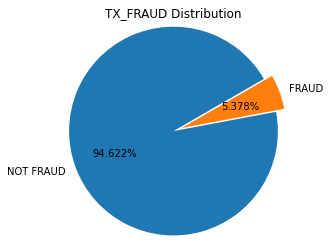

In [23]:
import matplotlib.pyplot as plt


labels = ['NOT FRAUD', 'FRAUD']
data = target_value_counts['count'].tolist()

explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(
    data, labels=labels, explode=explode, autopct='%1.3f%%', startangle=30, radius=1.2
)
ax.set_title("TX_FRAUD Distribution")

fig.show()

In [24]:
df.groupBy("tx_fraud_scenario").count().orderBy("tx_fraud_scenario").show()

+-----------------+--------+
|tx_fraud_scenario|   count|
+-----------------+--------+
|                0|44461413|
|                1|   25653|
|                2| 2435456|
|                3|   65896|
+-----------------+--------+



### Скрипты для работы с датасетом

In [28]:
def load_dataset(
    session: pyspark.sql.session.SparkSession,
    schema: pyspark.sql.types.StructType,
    filename: str
) -> pyspark.sql.dataframe.DataFrame:
    """"""
    df = session\
        .read\
        .option("header", "true")\
        .schema(schema)\
        .csv(filename)

    return df

In [30]:
def save_dataset_to_parquet(
    dataframe: pyspark.sql.dataframe.DataFrame,
    filename: str,
    partitions: int
) -> None:
    """"""
    # dataframe.write.parquet(filename, mode="overwrite")
    dataframe.repartition(partitions)\
        .write\
        .mode("overwrite")\
        .parquet(filename)

In [32]:
from pyspark.sql.functions import col, hour, dayofweek, month, when


def prepare_dataset(
    dataframe: pyspark.sql.dataframe.DataFrame
) -> pyspark.sql.dataframe.DataFrame:
    """
    - удаляет строки с пустыми записями, NaN, NULL
    - удаляет дубликаты
    - удаляет строки с отрицательными значениями customer_id
    - удаляет tx_datetime, вытащив из него полезную информацию
    - удаляет tx_fraud_scenario
    """
    # удаляем NaN
    df = dataframe.dropna()
    print("Удалены строки с NaN")

    # удаляем дубликаты
    # df = df.dropDuplicates()
    df = df.dropDuplicates(["transaction_id"])
    print("Удалены дубликаты")

    # удаляем строки с customer_id < 0
    df = df.filter(col("customer_id") >= 0)
    print("Удалены строки с customer_id < 0")

    # создаём новые фичи из tx_datetime
    df = df \
        .withColumn("tx_hour", hour(col("tx_datetime"))) \
        .withColumn("tx_day_of_week", dayofweek(col("tx_datetime"))) \
        .withColumn("tx_month", month(col("tx_datetime"))) \
        .withColumn("is_weekend", when(col("tx_day_of_week").isin(1, 7), 1).otherwise(0)
    )
    print("Созданы новые фичи из колонки 'tx_datetime'")

    cols_to_drop = [
        "tx_datetime",      # удаляем, потому что создали новые фичи
        "transaction_id",   # удаляём порядковый номер
        "tx_time_days",     # удаляем производную колонку от tx_time_seconds
        "tx_fraud_scenario" # удаляем, потому что предсказываем сам факт мошенничества
    ]

    df = df.drop(*cols_to_drop)
    print(f"Удалены колонки: {cols_to_drop}")

    return df

**Пример подготовки датасета**

In [33]:
df = prepare_dataset(df)
df.show(10)

Удалены строки с NaN
Удалены дубликаты
Удалены строки с customer_id < 0
Созданы новые фичи из колонки 'tx_datetime'
Удалены колонки: ['tx_datetime', 'transaction_id', 'tx_time_days', 'tx_fraud_scenario']
+-----------+-----------+---------+---------------+--------+-------+--------------+--------+----------+
|customer_id|terminal_id|tx_amount|tx_time_seconds|tx_fraud|tx_hour|tx_day_of_week|tx_month|is_weekend|
+-----------+-----------+---------+---------------+--------+-------+--------------+--------+----------+
|     422507|        671|    91.95|        1529522|       0|     16|             1|       9|         1|
|     423492|        895|    16.34|        1519168|       0|     13|             1|       9|         1|
|     423550|        573|    44.49|        1517377|       0|     13|             1|       9|         1|
|     423579|        265|     5.93|        1500915|       0|      8|             1|       9|         1|
|     423586|        565|    57.05|        1492789|       0|      6|

In [34]:
# удалим датафрейм из памяти
import gc


del df
gc.collect()

262

### Запустим скрипты на всём датасете

In [ ]:
%%time

# 1. можно было сразу копировать паркеты в s3
# 2. можно было написать умнее с учётом shuffle и `spark.conf.set("spark.sql.shuffle.partitions", 40)`, но как есть
df = load_dataset(spark, schema, "/user/ubuntu/data/")
print("df loaded")

df_clean = prepare_dataset(df)
print("df prepared")

save_dataset_to_parquet(df_clean, "data.parquet", 40)

df loaded
Удалены строки с NaN
Удалены дубликаты
Удалены строки с customer_id < 0
Созданы новые фичи из колонки 'tx_datetime'
Удалены колонки: ['tx_datetime', 'transaction_id', 'tx_time_days', 'tx_fraud_scenario']
df prepared
CPU times: user 690 ms, sys: 256 ms, total: 946 ms
Wall time: 1h 37min 31s


In [43]:
!hdfs dfs -ls -h /user/ubuntu/data.parquet

Found 41 items
-rw-r--r--   1 ubuntu hadoop          0 2026-01-31 21:59 /user/ubuntu/data.parquet/_SUCCESS
-rw-r--r--   1 ubuntu hadoop    589.6 M 2026-01-31 21:50 /user/ubuntu/data.parquet/part-00000-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop    586.3 M 2026-01-31 21:51 /user/ubuntu/data.parquet/part-00001-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop    589.6 M 2026-01-31 21:51 /user/ubuntu/data.parquet/part-00002-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop    589.6 M 2026-01-31 21:50 /user/ubuntu/data.parquet/part-00003-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop    587.6 M 2026-01-31 21:51 /user/ubuntu/data.parquet/part-00004-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet
-rw-r--r--   1 ubuntu hadoop    584.9 M 2026-01-31 21:51 /user/ubuntu/data.parquet/part-00005-a83b601d-6878-437c-be63-f7afb22907ce-c000.sn

In [44]:
# проверка
df_par = spark.read.parquet("/user/ubuntu/data.parquet/part-00000-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet")
df_par.show()

+-----------+-----------+---------+---------------+--------+-------+--------------+--------+----------+
|customer_id|terminal_id|tx_amount|tx_time_seconds|tx_fraud|tx_hour|tx_day_of_week|tx_month|is_weekend|
+-----------+-----------+---------+---------------+--------+-------+--------------+--------+----------+
|     280684|        949|     9.86|       60520515|       0|     11|             5|       7|         0|
|     456436|        957|    18.95|        1094859|       0|     16|             3|       9|         0|
|        590|        870|    67.23|      100269505|       0|     12|             3|      10|         0|
|     589522|          0|    55.28|      100093491|       0|     11|             1|      10|         1|
|     104373|        621|     8.91|       66544352|       1|      4|             5|       9|         0|
|     112692|        138|    79.43|       21137109|       1|     15|             4|       4|         0|
|     110985|         39|   102.93|       99396115|       0|    

In [ ]:
# копируем в S3
!hadoop distcp -m 40 /user/ubuntu/data.parquet s3a://otus-mlops-bucket-parquets-f02a83238337588f/data

2026-01-31 22:10:15,146 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2026-01-31 22:10:15,243 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2026-01-31 22:10:15,244 INFO impl.MetricsSystemImpl: s3a-file-system metrics system started
2026-01-31 22:10:17,010 INFO tools.DistCp: Input Options: DistCpOptions{atomicCommit=false, syncFolder=false, deleteMissing=false, ignoreFailures=false, overwrite=false, append=false, useDiff=false, useRdiff=false, fromSnapshot=null, toSnapshot=null, skipCRC=false, blocking=true, numListstatusThreads=0, maxMaps=40, mapBandwidth=0.0, copyStrategy='uniformsize', preserveStatus=[], atomicWorkPath=null, logPath=null, sourceFileListing=null, sourcePaths=[/user/ubuntu/data.parquet], targetPath=s3a://otus-mlops-bucket-parquets-f02a83238337588f/data, filtersFile='null', blocksPerChunk=0, copyBufferSize=8192, verboseLog=false, directWrite=false}, sourcePaths=[/user/ubuntu/data.parquet], targetPathExists=fa

2026-01-31 22:11:12,334 INFO mapred.LocalJobRunner: 68.2% Copying hdfs://rc1a-dataproc-m-uv1jpmfu8lkkii3g.mdb.yandexcloud.net/user/ubuntu/data.parquet/part-00001-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet to s3a://otus-mlops-bucket-parquets-f02a83238337588f/data/part-00001-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet [400.0M/586.3M] > map
2026-01-31 22:11:13,267 INFO mapreduce.Job:  map 6% reduce 0%
2026-01-31 22:11:18,335 INFO mapred.LocalJobRunner: 100.0% Copying hdfs://rc1a-dataproc-m-uv1jpmfu8lkkii3g.mdb.yandexcloud.net/user/ubuntu/data.parquet/part-00001-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet to s3a://otus-mlops-bucket-parquets-f02a83238337588f/data/part-00001-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet [586.3M/586.3M] > map
2026-01-31 22:11:20,868 INFO mapred.RetriableFileCopyCommand: Renaming temporary target file path s3a://otus-mlops-bucket-parquets-f02a83238337588f/data/.distcp.tmp.attempt_local1630578561_0001_m_000000_

2026-01-31 22:12:59,622 INFO mapred.RetriableFileCopyCommand: Completed writing s3a://otus-mlops-bucket-parquets-f02a83238337588f/data/part-00034-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet (613276004 bytes)
2026-01-31 22:12:59,656 INFO mapred.CopyMapper: Copying hdfs://rc1a-dataproc-m-uv1jpmfu8lkkii3g.mdb.yandexcloud.net/user/ubuntu/data.parquet/part-00019-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet to s3a://otus-mlops-bucket-parquets-f02a83238337588f/data/part-00019-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet
2026-01-31 22:12:59,687 INFO mapred.RetriableFileCopyCommand: Copying hdfs://rc1a-dataproc-m-uv1jpmfu8lkkii3g.mdb.yandexcloud.net/user/ubuntu/data.parquet/part-00019-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet to s3a://otus-mlops-bucket-parquets-f02a83238337588f/data/part-00019-a83b601d-6878-437c-be63-f7afb22907ce-c000.snappy.parquet
2026-01-31 22:12:59,687 INFO mapred.RetriableFileCopyCommand: Creating temp file: s3a://otus-ml